# Случайное блуждание с отражением

In [2]:
clc
clear
pkg load statistics
graphics_toolkit("gnuplot")

In [3]:
N = 6;
p = 0.8;
q = 1 - p;
figure_number = 1;

In [4]:
P = diag(p * ones(N - 1, 1), 1) + diag(q * ones(N - 1, 1), -1);

In [5]:
P(1, 1) = q;
P(N, N) = p

P =

   0.2000   0.8000        0        0        0        0
   0.2000        0   0.8000        0        0        0
        0   0.2000        0   0.8000        0        0
        0        0   0.2000        0   0.8000        0
        0        0        0   0.2000        0   0.8000
        0        0        0        0   0.2000   0.8000



In [6]:
if p != q
    for i = 1 : N
        th_prob(i) = (1 - p / q) * (p / q) ^ (i - 1) / (1 - (p / q) ^ N);
    end
else
    th_prob = 1 / N;
end

th_prob

th_prob =

   7.3260e-04   2.9304e-03   1.1722e-02   4.6886e-02   1.8755e-01   7.5018e-01



In [7]:
p0 = rand(1, N - 4);
p1 = [0, 0, p0 / sum(p0), 0, 0]

p1 =

        0        0   0.5536   0.4464        0        0



In [8]:
x = zeros(1, N);
x(1) = p1(1);
for i = 2 : N
    x(i) = x(i - 1) + p1(i);
end

In [9]:
u = rand(1, 1);
l = 1;
while u > x(l)
    ++l;
end

In [10]:
x0 = zeros(1, N);
x0(l) = 1;
prac_prob = x0 * (P ^ 200)

prac_prob =

   7.3260e-04   2.9304e-03   1.1722e-02   4.6886e-02   1.8755e-01   7.5018e-01



In [11]:
j = 1;
for k = 1 : 2 : 100
    Pn = x0 * P ^ k;
    Pn1(j, :) = Pn;
    ++j;
end

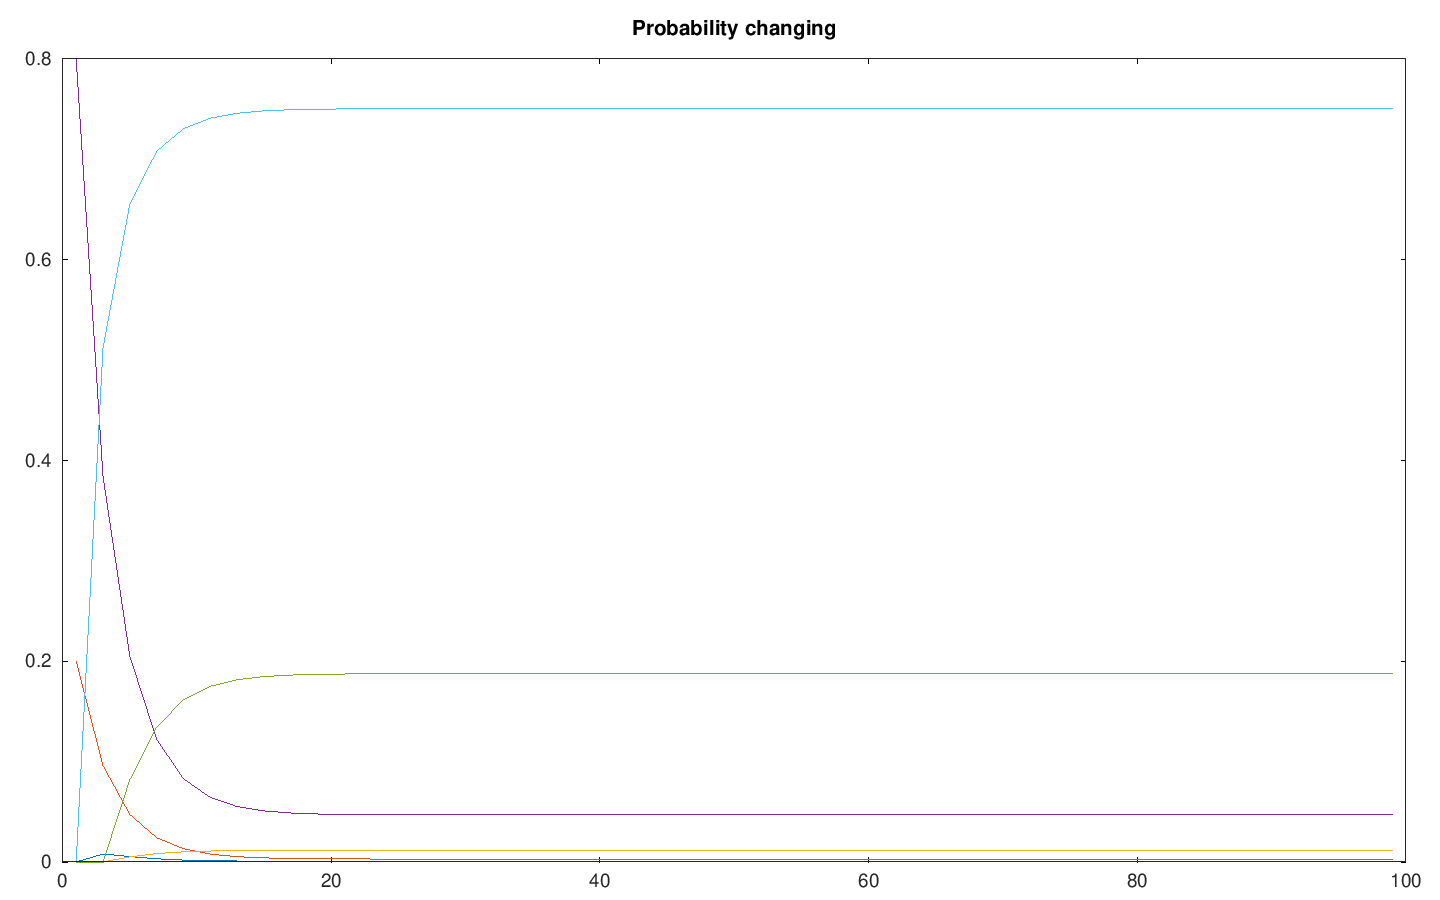

In [12]:
f = figure(figure_number++, "position", get(0, "screensize"));
plot(1 : 2 : 100, Pn1);
title('Probability changing')
pause(0.01)

In [13]:
s(1) = l;
for k = 2 : 200
    u = rand(1, 1);
    s(k) = s(k - 1);
    if s(k - 1) == 1
        s(k)++;
    elseif s(k - 1) == N
        s(k)--;
    elseif u < q
        s(k)--;
    else
        s(k)++;
    end
end

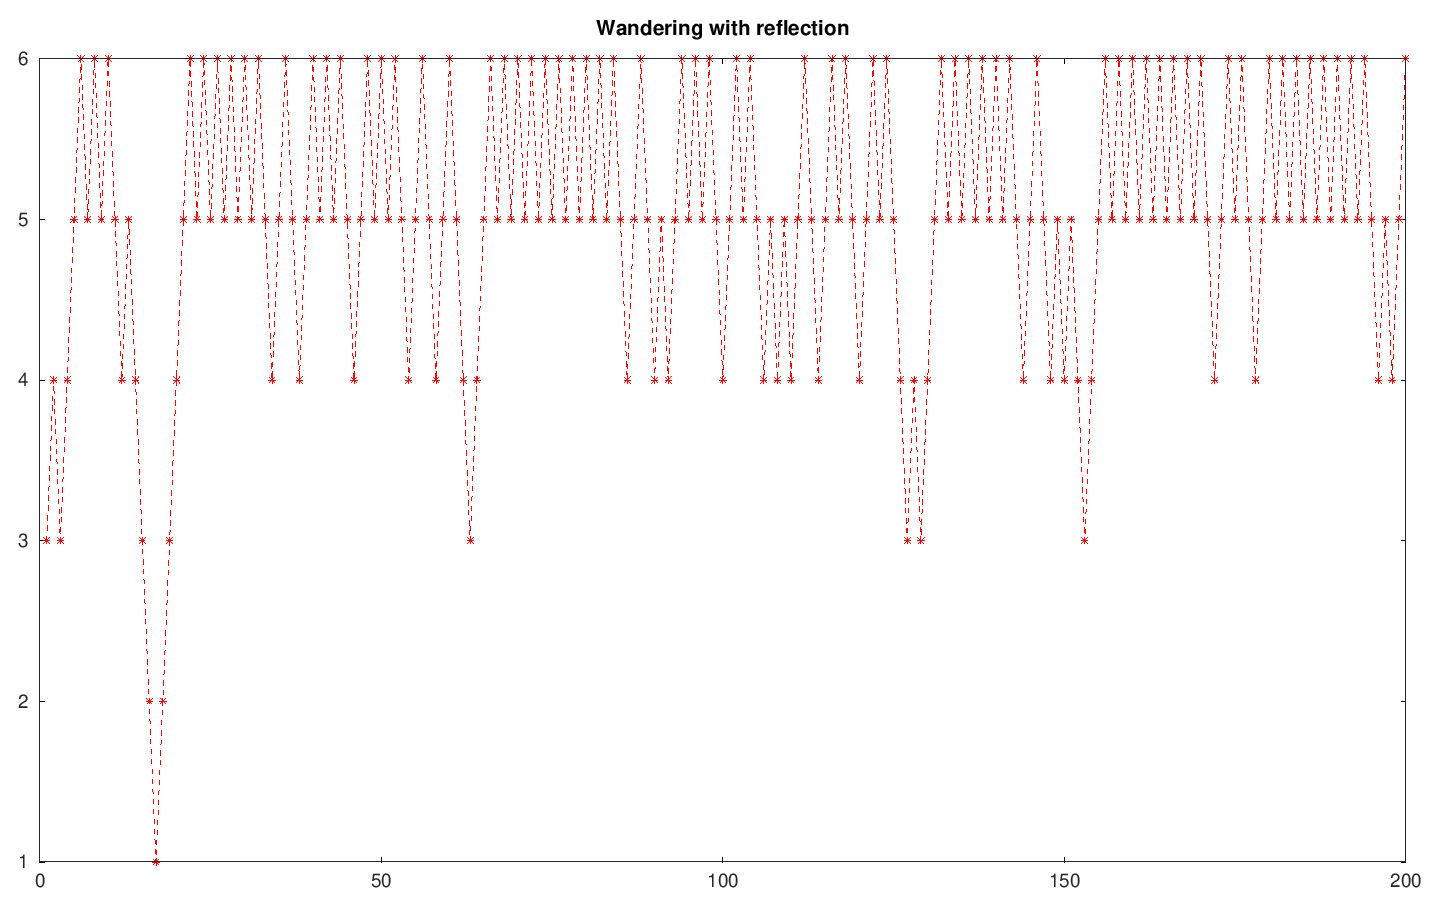

In [14]:
f = figure(figure_number++, "position", get(0, "screensize"));
plot(s, 'r--*')
title('Wandering with reflection')

**Вывод:**
- Практические и теоретические значения эквивалентны